# Using R with jupyter notebook

## How to install R in anaconda

Installing R is pretty straightforward. The required steps are the following:

1. Open Anaconda prompt
2. Create a new environmnent: conda create -n R (or however you wanna call it) anaconda (it will take a while) 
3. Activate your new environment: activate R
4. Run jupyter in the R env: jupyter notebook
                                                                                         
Et voilà !

## Running a little test script 

I took the explain from the r-bloggers website: https://www.r-bloggers.com/simple-regression-models-in-r/

### Gathering the data

In [1]:
# Loading the entire mtcars dataset
data(mtcars)

In [2]:
# Subsetting the dataset for our use
dat <- subset(mtcars,select=c(mpg,disp,hp,drat,wt))
head(dat)

mpg  disp hp  drat wt   
Mazda RX4         21.0 160  110 3.90 2.620
Mazda RX4 Wag     21.0 160  110 3.90 2.875
Datsun 710        22.8 108   93 3.85 2.320
Hornet 4 Drive    21.4 258  110 3.08 3.215
Hornet Sportabout 18.7 360  175 3.15 3.440
Valiant           18.1 225  105 2.76 3.460

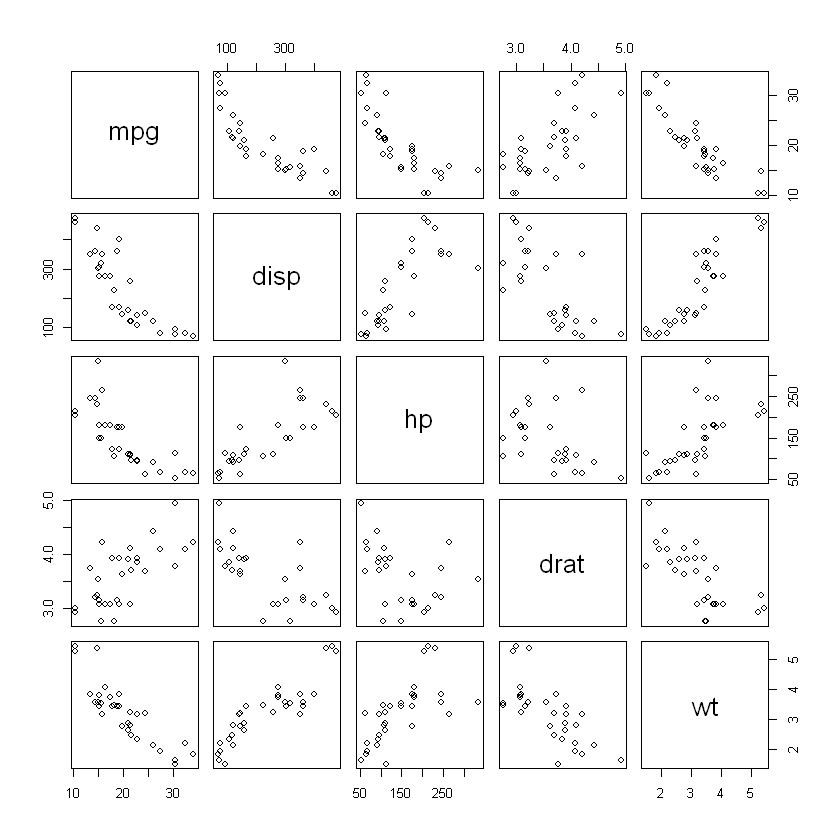

In [3]:
# Take a peek at the data plotting each feature against the other
plot(dat)

In [4]:
# Attach for rapid calls
attach(dat)

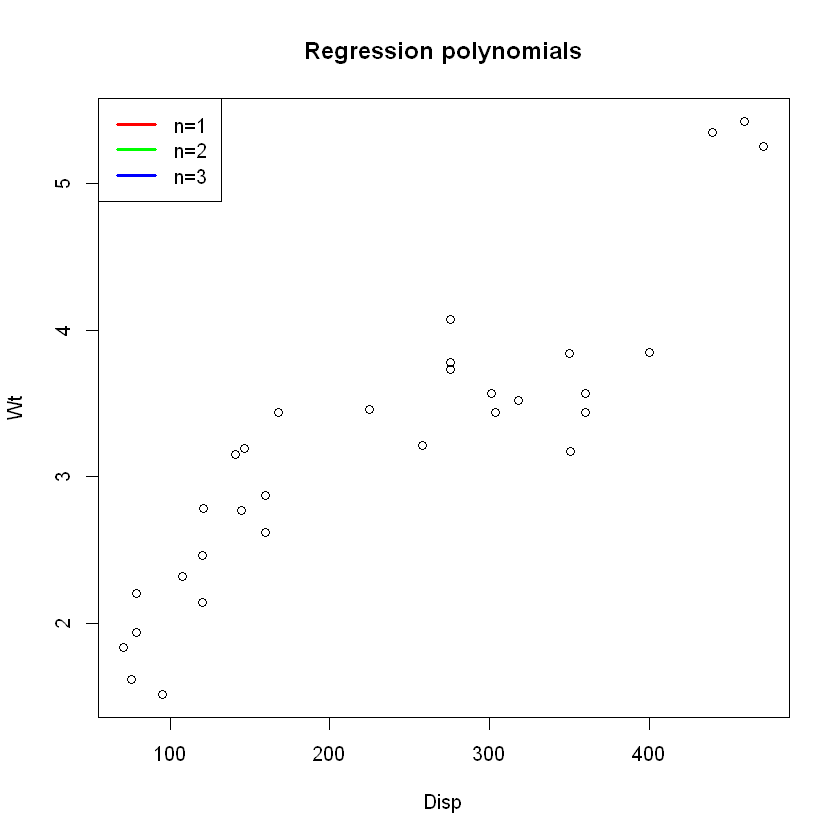

In [23]:
# Plot data to use
plot(disp,wt,type='p',xlab='Disp',ylab='Wt',main='Regression polynomials')

# Add a legend
legend("topleft",c("n=1","n=2","n=3"), col=c("red","green","blue"), lwd=3)

### Linear regression  y = a + bx  

In [14]:
# Fit the model
model1 <- lm(wt ~ disp)

In [15]:
# Parameters and information about the model
model1
coef(model1)
summary(model1)


Call:
lm(formula = wt ~ disp)

Coefficients:
(Intercept)         disp  
    1.59981      0.00701  


(Intercept)        disp 
1.599814597 0.007010325


Call:
lm(formula = wt ~ disp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89044 -0.29775 -0.00684  0.33428  0.66525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.5998146  0.1729964   9.248 2.74e-10 ***
disp        0.0070103  0.0006629  10.576 1.22e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4574 on 30 degrees of freedom
Multiple R-squared:  0.7885,	Adjusted R-squared:  0.7815 
F-statistic: 111.8 on 1 and 30 DF,  p-value: 1.222e-11


In [21]:
# Plot the model
plot(disp,wt,type='p',xlab='Disp',ylab='Wt',main='Regression polynomials')
legend("topleft",c("n=1","n=2","n=3"), col=c("red","green","blue"), lwd=3)
abline(model1,col='red',lwd=2)

In [25]:
# Plot data
plot(disp,wt,type='p',xlab='Disp',ylab='Wt',main='Linear regression')

model4 <- lm(wt ~ disp+mpg+hp+drat)
summary(model4)
coef(model4)

predicted <- fitted(model4)
original <- wt
mat <- cbind(predicted,original)

points(disp,predicted, type="p", col="red")


# Add a legend
legend("topleft",c("Observ.","Predicted"), col=c("black","red"), lwd=3)


Call:
lm(formula = wt ~ disp + mpg + hp + drat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55894 -0.24694 -0.05119  0.28431  0.90541 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.364821   0.963395   4.531 0.000107 ***
disp         0.005085   0.001318   3.857 0.000645 ***
mpg         -0.079981   0.024787  -3.227 0.003272 ** 
hp          -0.003519   0.001914  -1.839 0.076967 .  
drat        -0.054984   0.206363  -0.266 0.791922    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3945 on 27 degrees of freedom
Multiple R-squared:  0.8584,	Adjusted R-squared:  0.8374 
F-statistic: 40.92 on 4 and 27 DF,  p-value: 4.359e-11


(Intercept)         disp          mpg           hp         drat 
 4.364821444  0.005085248 -0.079981369 -0.003519188 -0.054983864